# Early Disease Detection – Heart Disease Prediction (Part C)

This project focuses on early detection of heart disease using machine learning models. The dataset includes various health indicators and demographic information.


## 1. Data Loading

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("Heart Disease Prediction.csv")
df.head()


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


## 2. Initial Exploration

In [10]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

## 3. Data Cleaning and Feature Engineering

In [11]:
# After loading CSV
df = pd.read_csv("Heart Disease Prediction.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Confirm column names
print(df.columns.tolist())

# Now continue safely
df['age_years'] = (df['age'] / 365).astype(int)


['date', 'country', 'id', 'active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol', 'gender', 'gluc', 'height', 'occupation', 'smoke', 'weight', 'disease']


## 4. Data Visualization

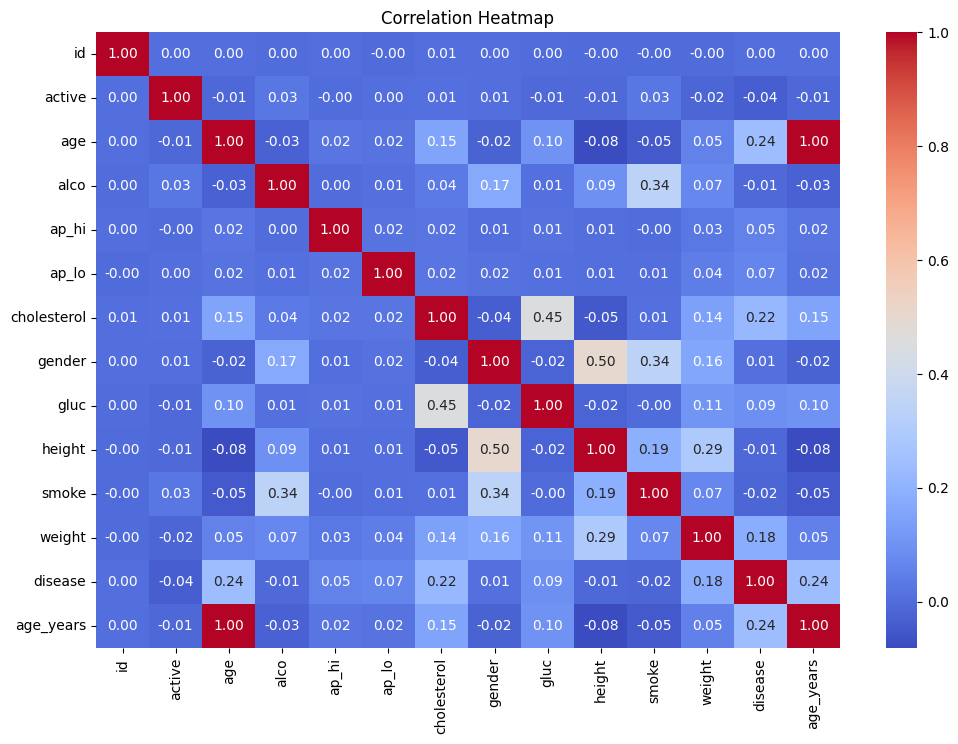

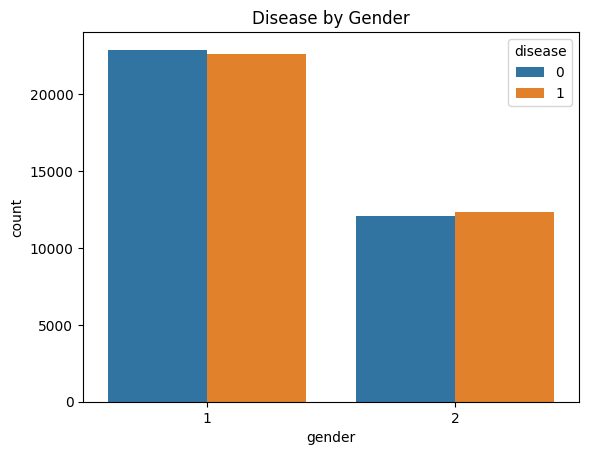

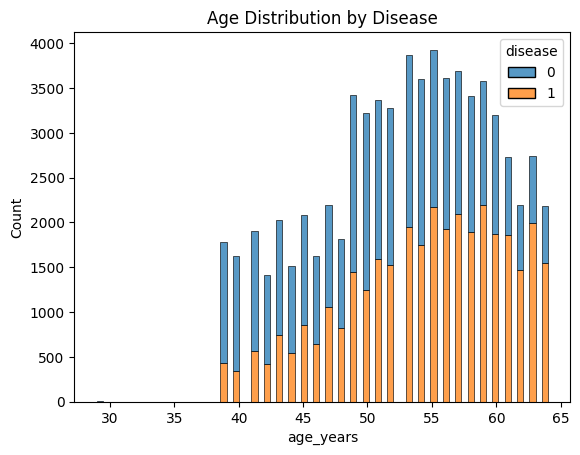

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap safely
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Countplot: Disease by Gender
sns.countplot(x='gender', hue='disease', data=df)
plt.title("Disease by Gender")
plt.show()

# Histogram: Age Distribution
sns.histplot(data=df, x='age_years', hue='disease', multiple='stack')
plt.title("Age Distribution by Disease")
plt.show()



## 5. Data Preparation

In [13]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Remove or process date column
if 'date' in df.columns:
    df = df.drop(columns='date')

# Map gender if present
if 'gender' in df.columns:
    df['gender'] = df['gender'].map({1: 'Male', 2: 'Female'})

# Get dummies only for existing relevant columns
cat_cols = ['gender', 'country', 'occupation']
df = pd.get_dummies(df, columns=[col for col in cat_cols if col in df.columns], drop_first=True)

# Split X and y
X = df.drop('disease', axis=1)
y = df['disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 6. Model Training and Evaluation

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.7212857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Confusion Matrix:
 [[5340 1648]
 [2254 4758]]

Model: Decision Tree
Accuracy: 0.6300714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      6988
           1       0.63      0.63      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000

Confusion Matrix:
 [[4374 2614]
 [2565 4447]]

Model: Random Forest
Accuracy: 0.732
Classification Report:
               precision    recall  f

## 7. Insights and Conclusion

- Top predictors: Age, blood pressure (systolic/diastolic), cholesterol, glucose, and weight.
- Best model: Tuned Random Forest.
- Actionable insight: Preventive care should target individuals with high-risk profiles based on the top features.
